In [1]:
import cv2
from PIL import Image
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from datetime import datetime
from random import seed
from random import random

# baseline model for the dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
#from data import load_cars, load_fruits
from PIL import Image
import cv2
from sklearn import preprocessing
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Activation
import keras
from tensorflow.keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
path_car_dataset = "E:/TU Wien - Master program Data Science/Semester 2 - 2019S/MLS-FD - Machine Learning/Exercise 3 - Deep Learning/CarData"
path_fruits_dataset = "C:/Users/Bogdan/Desktop/FIDS30"

In [3]:
from pathlib import Path
import numpy as np

def load_cars(dirname):
    dir = Path(dirname)
    cars = [[0 if f.parts[-1].startswith('neg-') else 1, f]
            for f in dir.joinpath('TrainImages').iterdir() if f.is_file()] \
         + [[1, f] for f in dir.joinpath('TestImages').iterdir() if f.is_file()] \
         + [[1, f] for f in dir.joinpath('TestImages_Scale').iterdir() if f.is_file()]
    return np.array(cars, dtype=object)

def load_fruits(dirname):
    dir = Path(dirname)
    fruits = [[d.parts[-1], f]
        for d in dir.iterdir() if d.is_dir()
        for f in d.iterdir() if f.is_file()]
    return np.array(fruits, dtype=object)

In [4]:
fruits = load_fruits(path_fruits_dataset)
print("Fruits {}:".format(fruits.shape))
print(fruits)
cars = load_cars(path_car_dataset)
print("Cars {}:".format(cars.shape))
print(cars)

Fruits (971, 2):
[['acerolas' WindowsPath('C:/Users/Bogdan/Desktop/FIDS30/acerolas/1.jpg')]
 ['acerolas'
  WindowsPath('C:/Users/Bogdan/Desktop/FIDS30/acerolas/10.jpg')]
 ['acerolas'
  WindowsPath('C:/Users/Bogdan/Desktop/FIDS30/acerolas/12.jpg')]
 ...
 ['watermelons'
  WindowsPath('C:/Users/Bogdan/Desktop/FIDS30/watermelons/7.jpg')]
 ['watermelons'
  WindowsPath('C:/Users/Bogdan/Desktop/FIDS30/watermelons/8.jpg')]
 ['watermelons'
  WindowsPath('C:/Users/Bogdan/Desktop/FIDS30/watermelons/9.jpg')]]
Cars (1328, 2):
[[0
  WindowsPath('E:/TU Wien - Master program Data Science/Semester 2 - 2019S/MLS-FD - Machine Learning/Exercise 3 - Deep Learning/CarData/TrainImages/neg-0.pgm')]
 [0
  WindowsPath('E:/TU Wien - Master program Data Science/Semester 2 - 2019S/MLS-FD - Machine Learning/Exercise 3 - Deep Learning/CarData/TrainImages/neg-1.pgm')]
 [0
  WindowsPath('E:/TU Wien - Master program Data Science/Semester 2 - 2019S/MLS-FD - Machine Learning/Exercise 3 - Deep Learning/CarData/TrainImages

In [5]:
print(type(cars))
print(cars.shape)
print(cars.size)
print(cars.ndim)
print(cars.dtype)

<class 'numpy.ndarray'>
(1328, 2)
2656
2
object


We get an numpy.ndarray with label / path to the image

In [6]:
def preprocess_images(images):

    """
    load images, return theirs corresponding arrays and encoded target values
    """

    images_array = []
    print('loading images...')
    for img in images:
        img = cv2.resize(np.array(Image.open(img[1]).convert('RGB')), (224, 224))
        images_array.append(img)
    images_array = np.array(images_array)
    images_array = (images_array - images_array.mean()) / images_array.std() # Standardization
    return images_array

In [7]:
cars_preprocessed = preprocess_images(cars)

loading images...


In [8]:
print(type(cars_preprocessed))
print(len(cars_preprocessed))

<class 'numpy.ndarray'>
1328


In [9]:
print(cars_preprocessed[0,1])

[[-0.81859142 -0.81859142 -0.81859142]
 [-0.83265345 -0.83265345 -0.83265345]
 [-0.87483955 -0.87483955 -0.87483955]
 [-0.90296361 -0.90296361 -0.90296361]
 [-0.87483955 -0.87483955 -0.87483955]
 [-0.84671548 -0.84671548 -0.84671548]
 [-0.79046735 -0.79046735 -0.79046735]
 [-0.72015718 -0.72015718 -0.72015718]
 [-0.69203312 -0.69203312 -0.69203312]
 [-0.69203312 -0.69203312 -0.69203312]
 [-0.72015718 -0.72015718 -0.72015718]
 [-0.77640532 -0.77640532 -0.77640532]
 [-0.81859142 -0.81859142 -0.81859142]
 [-0.83265345 -0.83265345 -0.83265345]
 [-0.84671548 -0.84671548 -0.84671548]
 [-0.81859142 -0.81859142 -0.81859142]
 [-0.79046735 -0.79046735 -0.79046735]
 [-0.80452938 -0.80452938 -0.80452938]
 [-0.83265345 -0.83265345 -0.83265345]
 [-0.87483955 -0.87483955 -0.87483955]
 [-0.94514971 -0.94514971 -0.94514971]
 [-0.98733581 -0.98733581 -0.98733581]
 [-0.97327378 -0.97327378 -0.97327378]
 [-0.95921175 -0.95921175 -0.95921175]
 [-0.88890158 -0.88890158 -0.88890158]
 [-0.80452938 -0.80452938

In [10]:
print(type(cars_preprocessed))
print(cars_preprocessed.shape)
print(cars_preprocessed.size)
print(cars_preprocessed.ndim)
print(cars_preprocessed.dtype)

<class 'numpy.ndarray'>
(1328, 224, 224, 3)
199901184
4
float64


In [11]:
# define cnn model
def define_model_data_augmentation():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [12]:
SEED = 1

In [15]:
def train_cnn(dataset, data_aug=True):
    """
       fit and save the CNN model, prints the accuracy score and save the loss plot
    """
    if dataset == "fruits":
        nr_classes = 30
        images = load_fruits(path_fruits_dataset)
    elif dataset == "cars":
        nr_classes = 2
        images = load_cars(path_car_dataset)

    cnn_model = define_model_data_augmentation()
    print(type(cnn_model))
    # Label encoding for categorical target
    le = preprocessing.LabelEncoder()
    le.fit(images[:, 0])
    y = le.transform(images[:, 0]).tolist()
    X = preprocess_images(images)
    print (X.shape)
    #print (Y.shape)
    train_X, test_X, train_y, test_y = train_test_split(X, to_categorical(y), test_size=0.2, random_state=SEED)

    #es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1)
    #mc = ModelCheckpoint(''.join(['C:/Users/Bogdan', "cnn" , '_', dataset, '.h5']), monitor='accuracy', mode='max', verbose=1, save_best_only=True)
    mc = ModelCheckpoint(''.join(['cnn_', dataset, '.h5']), monitor='accuracy', mode='max', verbose=1, save_best_only=True)
    batch_size = 40
    validation_split = 0.2
    if not data_aug:
        history = cnn_model.fit(train_X, train_y, batch_size=batch_size, epochs=10, verbose=1, validation_split=validation_split, class_weight='auto', callbacks=[mc])
    else:
        datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

        train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=validation_split, random_state=SEED)

        datagen.fit(train_X)
        steps_per_epoch=int((len(train_X) / batch_size))

        history = cnn_model.fit_generator(datagen.flow(train_X, train_y, batch_size=batch_size), steps_per_epoch=steps_per_epoch, epochs=100, verbose=1, validation_data=(val_X, val_y), class_weight='auto', callbacks=[ mc])
    # Print accuracy score
    scores = cnn_model.evaluate(test_X, test_y, verbose=0)
    # return model
    # Plot training history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    #plt.savefig(''.join(['estimators/', model, '', dataset, '', 'loss','.png']))
    return history
    print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1] * 100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 56, 56, 128)       73856     
__________

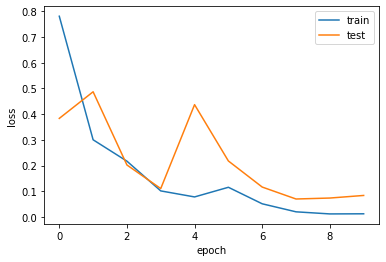

In [16]:
train_cnn("cars", data_aug=False)